In [9]:
import os
import glob
import pandas as pd
import numpy as np
import librosa
import random

import hmmlearn
import hsmmlearn

import matplotlib.pyplot as plt

In [2]:
base_song_path = "F:/Nicolas/DNUPycharmProjects/machine_learning/audio/FMA/fma_small/000/000002.mp3"

In [69]:
y, sr = librosa.load(base_song_path, sr=None, mono = True)

if sr != 44100:
    y = librosa.resample(y, sr, 44100)
    sr = 44100

In [56]:
from hsmmlearn.hsmm import GaussianHSMM

durations = np.array([
    [0.1, 0.0, 0.0, 0.9],
    [0.1, 0.0, 0.9, 0.0],
    [0.1, 0.9, 0.0, 0.0]
])
tmat = np.array([
    [0.0, 0.5, 0.5],
    [0.3, 0.0, 0.7],
    [0.6, 0.4, 0.0]
])

means = np.array([0.0, 5.0, 10.0])
scales = np.ones_like(means)

hsmm = GaussianHSMM(
    means, scales, durations, tmat,
)

In [57]:
observations, states = hsmm.sample(300)

In [58]:
print(states[:20])

[0 0 0 0 2 2 0 0 0 0 1 1 1 0 0 0 0 2 2 1]


In [59]:
print(observations[:20])

[ 1.60830999 -0.48671058 -0.7521131  -1.9842438  10.49739604 10.61427829
 -0.23136916  2.45369569 -1.31619181 -1.39160173  7.02907841  6.56662203
  4.92097838 -0.20143395 -1.13963076  0.24360804 -0.10452152  9.98045575
  9.36696714  3.81673001]


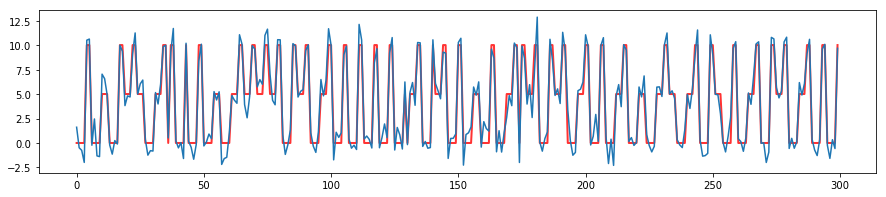

In [60]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[states], 'r', linewidth=2, alpha=.8)
ax.plot(observations)
plt.show()

In [61]:
decoded_states = hsmm.decode(observations)

In [62]:
print(decoded_states[:20])

[0 0 0 0 2 2 0 0 0 0 1 1 1 0 0 0 0 2 2 1]


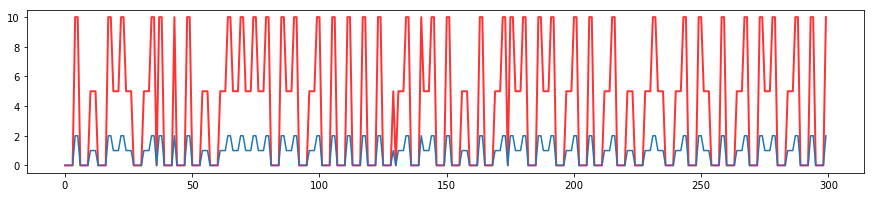

In [63]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(means[states], 'r', linewidth=2, alpha=.8)
ax.plot(decoded_states)
plt.show()

In [55]:
np.sum(states != decoded_states)

0

In [64]:
decoded_states = hsmm.decode(y)

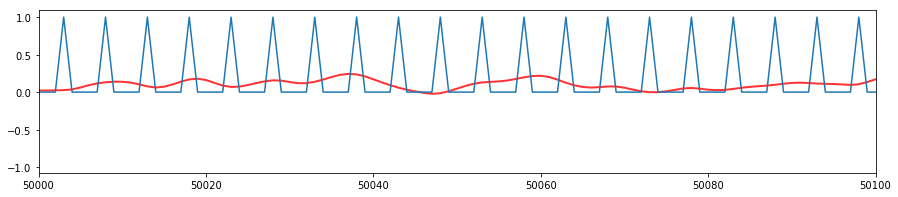

In [78]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(y, 'r', linewidth=2, alpha=.8)
ax.plot(decoded_states)
plt.xlim(50000, 50100)
plt.show()